**Problem Definition**

Classification of the weather image into one of the following classes

1. Sunrise
2. Shine
3. Rain
4. Cloudy

**Data**

[Dataset](https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset)

1. The dataset contains images of corresponding to the Sunrise, Shine, Rain, Cloudy weather conditions
2. Class Distribution
    1. Sunrise - 357 
    2. Shine - 253
    3. Rain - 215
    4. Clody - 300
3. The updated folder structure of the dataset facilitate the data load prodecure

Data Publication
1. The dataset was published on [Mendeley Data](https://data.mendeley.com/datasets/4drtyfjtfy/1)
2. Cite: Ajayi, Gbeminiyi (2018), Multi-class Weather Dataset for Image Classification, Mendeley Data, v1
3. [DOI](http://dx.doi.org/10.17632/4drtyfjtfy.1)
4. Published: 2018-09-13
5. Institutions: University of South Africa - Science Campus
6. Licence: [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)


**Evaluation**

Accuracy

**Modelling**

Fully Convolutional Network (FCN)

In [9]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow import keras

import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

In [21]:
# Splitting the data into train(80%), validation(10%), test(10%)

source_path = 'data/Weather'
classes = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

for weather_class in classes:
    os.makedirs(source_path + '/Train/' + weather_class)
    os.makedirs(source_path + '/Val/' + weather_class)
    os.makedirs(source_path + '/Test/' + weather_class)
    
    file_names = os.listdir(source_path + '/' + weather_class)
    np.random.shuffle(file_names)
    
    train_file_names, val_file_names, test_file_names = np.split(file_names, [int(len(file_names) * (0.8)), int(len(file_names) * (0.9))])
    
    train_file_names = [source_path + '/' + weather_class + '/' + name for name in train_file_names.tolist()]
    val_file_names = [source_path + '/' + weather_class + '/' + name for name in val_file_names.tolist()]
    test_file_names = [source_path + '/' + weather_class + '/' + name for name in test_file_names.tolist()]
    
    
    for name in train_file_names:
        shutil.move(name, source_path + '/train/' + weather_class)
        
    for name in val_file_names:
        shutil.move(name, source_path + '/val/' + weather_class)
        
    for name in test_file_names:
        shutil.move(name, source_path + '/test/' + weather_class)
        
    shutil.rmtree(source_path + '/' + weather_class)


# Initial End-to-End Workflow (Start)

In [12]:
# tf.keras.utils.image_dataset_from_directory is reshaping the data

# train_ds = tf.keras.utils.image_dataset_from_directory(
#     'data/Weather/Train',
#     batch_size=None
# )

Found 899 files belonging to 4 classes.


In [4]:
train_ds = tf.data.Dataset.list_files('data/Weather/Train/*/*')

b'data\\Weather\\Train\\Sunrise\\sunrise304.jpg'
b'data\\Weather\\Train\\Rain\\rain140.jpg'
b'data\\Weather\\Train\\Cloudy\\cloudy28.jpg'
b'data\\Weather\\Train\\Cloudy\\cloudy136.jpg'
b'data\\Weather\\Train\\Shine\\shine33.jpg'


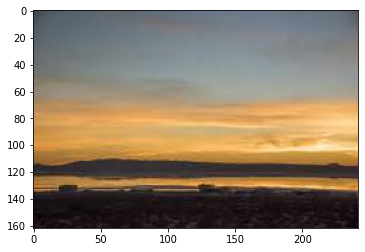

In [14]:
raw = tf.io.read_file('data/Weather/Train/Sunrise/sunrise304.jpg')
img = tf.image.decode_jpeg(raw, channels=3)
plt.imshow(img)

In [95]:
tf.equal(tf.constant(b'Cloudy', dtype='string'), b'Cloudy')

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [97]:
label_map = {b'Cloudy': 0, b'Rain': 1, b'Shine': 2, b'Sunrise': 3}

f0 = lambda : tf.constant(0)
f1 = lambda : tf.constant(1)
f2 = lambda : tf.constant(2)
f3 = lambda : tf.constant(3)

def get_image_label(file_path):
    label = tf.strings.split(file_path, os.sep)[-2]
    
    label_int = tf.case([(tf.equal(label, b'Cloudy'), f0),
                         (tf.equal(label, b'Rain'), f1),
                         (tf.equal(label, b'Shine'), f2),
                         (tf.equal(label, b'Sunrise'), f3)
                        ])
    
    raw = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(raw, channels=3)
    img = img/255
    return img, label_int

In [105]:
train_ds = tf.data.Dataset.list_files('data/Weather/Train/*/*')

train_labeled_ds = train_ds.map(get_image_label)

In [106]:
for i in train_labeled_ds.take(1):
    sample_inst = i

(<matplotlib.image.AxesImage at 0x243511be910>,
 <tf.Tensor: shape=(), dtype=int32, numpy=3>)

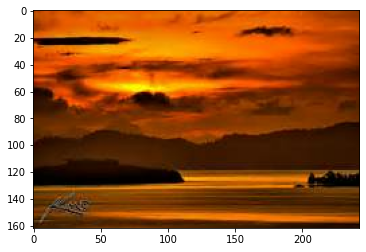

In [107]:
plt.imshow(sample_inst[0]), sample_inst[1]

In [108]:
train_ds = tf.data.Dataset.list_files('data/Weather/Train/*/*')
val_ds = tf.data.Dataset.list_files('data/Weather/Val/*/*')
test_ds = tf.data.Dataset.list_files('data/Weather/Test/*/*')

train_labeled_ds = train_ds.map(get_image_label)
val_labeled_ds = val_ds.map(get_image_label)
test_labeled_ds = test_ds.map(get_image_label)

# Initial End-to-End Workflow (End)